# Project - Spam Mail Detection

Here we will try to create a model using NLP and RandomForest Classifier to identify whether a given mail is a spam mail or ham mail.

In [3]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt

In [4]:
messages = pd.read_csv("spam.csv", encoding='cp1252')

In [5]:
messages.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
messages.rename(columns={"v1":"label","v2":"message"},inplace=True) # Labeling the columns

In [7]:
length=messages.message.apply(len)

In [8]:
messages=messages.iloc[:,[0,1]]

In [9]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
messages=pd.concat([messages,length],axis=1)

In [11]:
messages.columns.values[2]="Length"

In [12]:
messages.head()

,label,message,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [13]:
from nltk.corpus import stopwords

In [14]:
stoplist=stopwords.words("english")

In [15]:
type(stoplist)

list

stoplist

In [16]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

## Example to understand removing punction

In [17]:
abc="i want to ? remove !! all the punctuation marks $ from \\"

In [18]:
abc_refined=[i for i in abc if i not in string.punctuation]

In [19]:
abc_refined

['i',
 ' ',
 'w',
 'a',
 'n',
 't',
 ' ',
 't',
 'o',
 ' ',
 ' ',
 'r',
 'e',
 'm',
 'o',
 'v',
 'e',
 ' ',
 ' ',
 'a',
 'l',
 'l',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n',
 ' ',
 'm',
 'a',
 'r',
 'k',
 's',
 ' ',
 ' ',
 'f',
 'r',
 'o',
 'm',
 ' ']

In [20]:
abc_refined="".join(abc_refined)
abc_refined

'i want to  remove  all the punctuation marks  from '

In [21]:
aa=abc_refined.split()

In [22]:
aa

['i', 'want', 'to', 'remove', 'all', 'the', 'punctuation', 'marks', 'from']

## User Defined Function to Remove stopwords and Punctuations 

In [23]:
def text_process(mess):
    """
    1.remove the punctuations
    2.remove the stopwards
    3. return the list of clean textwords
    """
    nonpunc=[char for char in mess if char not in string.punctuation]
    nonpunc="".join(nonpunc)
    return [word for word in nonpunc.split() if word not in stopwords.words("english")]

In [24]:
messages['message'].apply(text_process)

0       [Go, jurong, point, crazy, Available, bugis, n...
1                          [Ok, lar, Joking, wif, u, oni]
2       [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3           [U, dun, say, early, hor, U, c, already, say]
4       [Nah, I, dont, think, goes, usf, lives, around...
                              ...                        
6771    [This, 2nd, time, tried, 2, contact, u, U, å£7...
6772             [Will, Ì, b, going, esplanade, fr, home]
6773                     [Pity, mood, Soany, suggestions]
6774    [The, guy, bitching, I, acted, like, id, inter...
6775                              [Rofl, Its, true, name]
Name: message, Length: 6776, dtype: object

In [25]:
#Creating Wordcloud

In [26]:
from wordcloud import WordCloud

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
cloud=WordCloud().generate(str(messages['message']))

In [ ]:
plt.imshow(cloud)

In [107]:
#Spam and Ham WordCloud

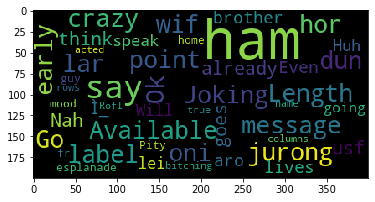

In [113]:
cloud1=WordCloud().generate(str(messages[messages.label=="ham"]))
plt.imshow(cloud1)

In [109]:
wc=WordCloud(max_words=50)

In [110]:
cloud3=wc.generate(str(messages['message']))

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
how_transformer=CountVectorizer(analyzer=text_process).fit(messages["message"])

In [29]:
how_transformer.vocabulary_

{'Go': 2078,
 'jurong': 7633,
 'point': 8986,
 'crazy': 5863,
 'Available': 1117,
 'bugis': 5314,
 'n': 8408,
 'great': 7023,
 'world': 11219,
 'la': 7744,
 'e': 6309,
 'buffet': 5313,
 'Cine': 1497,
 'got': 6992,
 'amore': 4754,
 'wat': 11021,
 'Ok': 3122,
 'lar': 7777,
 'Joking': 2489,
 'wif': 11128,
 'u': 10758,
 'oni': 8659,
 'Free': 1959,
 'entry': 6422,
 '2': 421,
 'wkly': 11179,
 'comp': 5713,
 'win': 11140,
 'FA': 1855,
 'Cup': 1565,
 'final': 6648,
 'tkts': 10574,
 '21st': 441,
 'May': 2843,
 '2005': 428,
 'Text': 4015,
 '87121': 858,
 'receive': 9320,
 'questionstd': 9227,
 'txt': 10746,
 'rateTCs': 9268,
 'apply': 4832,
 '08452810075over18s': 72,
 'U': 4140,
 'dun': 6296,
 'say': 9621,
 'early': 6314,
 'hor': 7268,
 'c': 5357,
 'already': 4731,
 'Nah': 2993,
 'I': 2321,
 'dont': 6216,
 'think': 10496,
 'goes': 6963,
 'usf': 10857,
 'lives': 7917,
 'around': 4878,
 'though': 10513,
 'FreeMsg': 1961,
 'Hey': 2249,
 'darling': 5958,
 '3': 534,
 'weeks': 11067,
 'word': 11206,
 

In [30]:
len(how_transformer.vocabulary_) #Total no of Unique words

11480

In [31]:
messages_how=how_transformer.transform(messages.message)

In [32]:
print(messages_how)

  (0, 1117)	1
  (0, 1497)	1
  (0, 2078)	1
  (0, 4754)	1
  (0, 5313)	1
  (0, 5314)	1
  (0, 5863)	1
  (0, 6309)	1
  (0, 6992)	1
  (0, 7023)	1
  (0, 7633)	1
  (0, 7744)	1
  (0, 8408)	1
  (0, 8986)	1
  (0, 11021)	1
  (0, 11219)	1
  (1, 2489)	1
  (1, 3122)	1
  (1, 7777)	1
  (1, 8659)	1
  (1, 10758)	1
  (1, 11128)	1
  (2, 72)	1
  (2, 421)	1
  (2, 428)	1
  :	:
  (6772, 11410)	1
  (6773, 3286)	1
  (6773, 3778)	1
  (6773, 8324)	1
  (6773, 10263)	1
  (6774, 2321)	1
  (6774, 4029)	1
  (6774, 4610)	1
  (6774, 5152)	1
  (6774, 5347)	1
  (6774, 6374)	1
  (6774, 6790)	1
  (6774, 6887)	1
  (6774, 7069)	1
  (6774, 7367)	1
  (6774, 7474)	1
  (6774, 7875)	1
  (6774, 8491)	1
  (6774, 9980)	1
  (6774, 10845)	1
  (6774, 11062)	1
  (6775, 2428)	1
  (6775, 3487)	1
  (6775, 8420)	1
  (6775, 10708)	1


In [125]:
type(messages_how)

scipy.sparse.csr.csr_matrix

In [30]:
messages_how.shape

(6776, 11480)

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test=train_test_split(messages_how,messages.label,test_size=.2,random_state=101)

In [35]:
from sklearn.naive_bayes import MultinomialNB

In [36]:
nb=MultinomialNB()

In [37]:
nb.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [38]:
pred=nb.predict(x_test)

In [39]:
pred


array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [139]:
#In above code we are creating a model to predict whether the word will fall in spam or ham category

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
nb_conf=confusion_matrix(pred,y_test)
nb_accu=nb_conf.diagonal().sum()/nb_conf.sum()
print("Accuracy of Naive Byes Model is",nb_accu*100,"%")

Accuracy of Naive Byes Model is 97.4188790560472 %


## Building model using Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
rf=RandomForestClassifier()

In [45]:
rf_nlp=rf.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [46]:
rf_nlp_pred=rf.predict(x_test)

In [47]:
conf=confusion_matrix(rf_nlp_pred,y_test)

In [52]:
accu=conf.diagonal().sum()/conf.sum()
accu=round(accu,3)
print("Accuracy of Random Forest Model is",accu*100,"%")

Accuracy of Random Forest Model is 97.6 %
